In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib as plt
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

# Get dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/MIDTERM-Real estate.csv", sep=",")

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Understanding the data

In [ ]:
# Column names of the dataset
print("----------------------")
print("Names of the variables")
print(df.columns)
print("----------------------")
print("--------------------------------------------------------------------")

# Info our dataset
print("Info on dataset")
df.info()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
# Shape of the dataset
print("----------------------")
print("Shape of dataset")
print(df.shape)
print("----------------------")
print("--------------------------------------------------------------------")

# Info our dataset
print("Info on dataset")
df.info()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# Describe our dataset
print("Description of dataset")
print(df.describe())
print("--------------------------------------------------------------------------")
print("--------------------------------------------------------------------------")

# Number of continuous variable in each column
print(df.select_dtypes(include='number').columns)
print("Number of features that are continous : ", len(df.select_dtypes(include='number').columns)-1,"\n")
print("--------------------------------------------------------------------------")
print("--------------------------------------------------------------------------")

----------------------
Names of the variables
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
----------------------
--------------------------------------------------------------------
Info on dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude         

### Renaming Column names

In [ ]:
df=df.rename(columns = {'X1 transaction date':'date', 'X2 house age':'age', 'X3 distance to the nearest MRT station':'dist_to_station',
                     'X4 number of convenience stores':'num_stores','Y house price of unit area':'price','X1 transaction date':'date',
                     'X5 latitude':'latitude', 'X6 longitude':'longitude'})

### Checking for null values

In [ ]:
# isnull() checks missing values in each variable. 
#.sum() adds all the missing values in each variable and displays
df.isnull().sum()

No                 0
date               0
age                0
dist_to_station    0
num_stores         0
latitude           0
longitude          0
price              0
dtype: int64

### Cleaning date column

In [ ]:
# converting date from float to str and then to int
df['date'] = df['date'].astype('str')
df['date']= df['date'].str.replace('.','').str[:4].astype('int64')
df.head()

<ipython-input-9-018deabe4643>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['date']= df['date'].str.replace('.','').str[:4].astype('int64')


,No,date,age,dist_to_station,num_stores,latitude,longitude,price
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


### Rounding the floating values to the nearest 2 decimals

In [ ]:
df =df.round({"dist_to_station":2, "latitude":2, "longitude":2})
#df.head()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


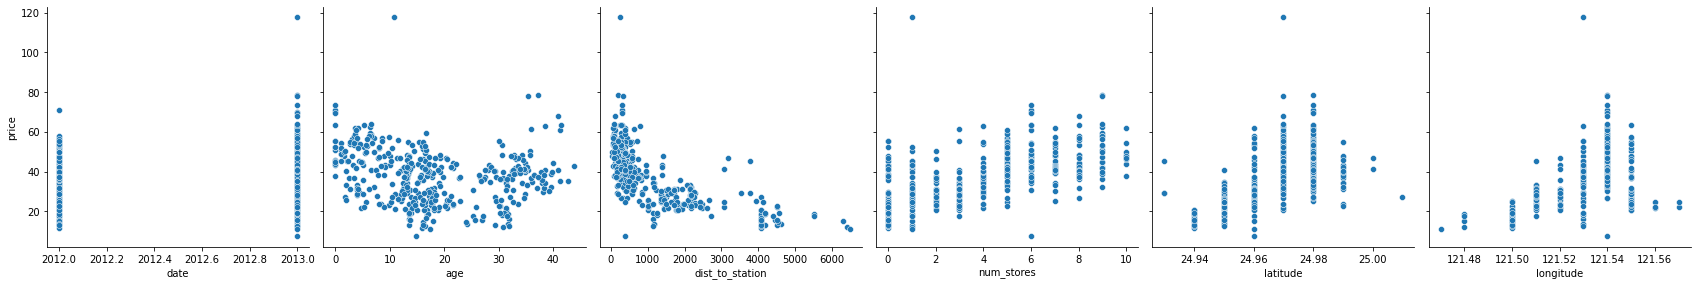

In [ ]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['date', 'age', 'dist_to_station', 'num_stores', 'latitude',
       'longitude'], 
             y_vars='price', size=4, aspect=1, kind='scatter')
plt.show()

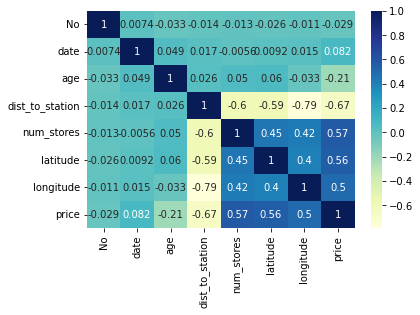

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

The heat map indicates a very strong negative correlation between price and distance to the nearest station and a moderate positive correlation between price and longitude, latitude and the number of convenience stores. There is a very weak relationship between price and the rest of the variables.

Since distance to the nearest station is also highly correlated to longitude, latitude and the number of stores, i would create a regression model based on distance to the nearest station to predict the price of the house

In [ ]:
# Creating X and y
X = df['dist_to_station']
y = df['price']

## Create Train and Test sets

In [ ]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 21)

## Building and Training the model

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     251.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           4.16e-41
Time:                        15:38:07   Log-Likelihood:                -1069.9
No. Observations:                 289   AIC:                             2144.
Df Residuals:                     287   BIC:                             2151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              45.9521      0.753     

R-squared value is 0.467 which means that only 46.7% of the price variance can be explained by the distance to the nearest station. This can be inferred as eihter model is weak or we have an insufficient data

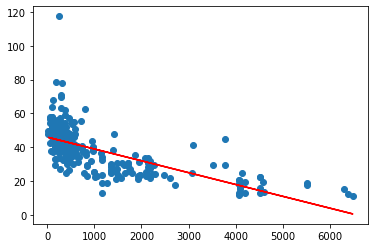

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 45.9521 - 0.0070*X_train, 'r')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


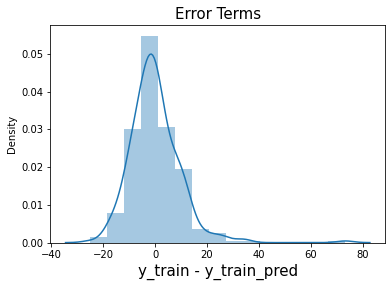

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

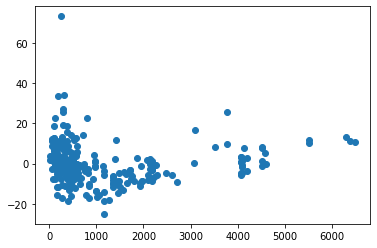

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 10 predicted values
y_test_pred

326    45.555943
265    40.228530
72     42.974028
47     41.457442
288    43.681465
         ...    
91     36.117262
182    30.888756
165    37.277920
335    43.583890
333    45.216851
Length: 125, dtype: float64

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.4185713839208727